In [1]:
import geopandas as gpd

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

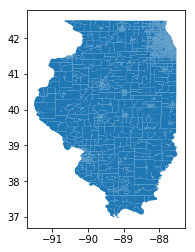

In [2]:
geo_df = gpd.read_file("/Users/Xinyuan/Downloads/hw-4-MeredithZ-master/data")
geo_df.plot()

Import the tracts for Chicago

In [3]:
tract_df = gpd.read_file("/Users/Xinyuan/Downloads/hw-4-MeredithZ-master/data")

In [4]:
tract_df = tract_df[tract_df["COUNTYFP"] == "031"]
tract_df.rename(columns = {"NAME" : "Census Tract"}, inplace = True)

There is latitudes and longitudes in our csv file. Import the csv and make the geometry

In [5]:
total_df = pd.read_csv("greater60less80.csv", usecols = [2, 3])
total_df.dropna(inplace = True)

To make the geometry, do a list comprehension to create a point from every (longitude, latitude) pair.

In [6]:
total_df.columns.tolist()

['longitude', 'latitude']

In [7]:
total_df.head()

,longitude,latitude
0,-87.755127,41.880482
1,-87.745491,41.881878
2,-87.755127,41.880482
3,-87.765266,41.887806
4,-87.764946,41.880356


In [8]:
import shapely

In [9]:
shapely

<module 'shapely' from '/Users/Xinyuan/anaconda3/envs/py-geo/lib/python3.6/site-packages/shapely/__init__.py'>

In [10]:
from shapely.geometry import Point

In [11]:
geometry = [Point(xy) for xy in zip(total_df.longitude, total_df.latitude)]
total_coords = gpd.GeoDataFrame(total_df, crs = {'init': 'epsg:4269'}, geometry=geometry)

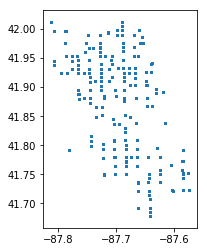

In [12]:
total_coords.plot(markersize = 1.5)

# Spatial Join of Violations Zip code Areas

In [13]:
total_df= gpd.sjoin(total_coords, tract_df, how = 'left', op = 'within')

Aggregate these groupby data to get a count per Census Tract

In [14]:
violation_tract_count = total_df.groupby("Census Tract").count()

Every column is the violation account

In [15]:
violation_tract_count = violation_tract_count[["index_right"]].rename(columns = {"index_right" : "Violation"})

Put the GeoDataFrame on the left

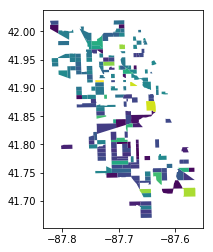

In [16]:
mapped_violations = pd.merge(tract_df, violation_tract_count, how = "inner", left_on = "Census Tract", right_index = True)
mapped_violations.plot(column = "Violation", k = 9, linewidth = 0)